In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import os

In [6]:
# reading in data
spam_df = pd.read_csv('data/spam.csv',encoding='latin')

# structure of data
print("The number of records in the data is:",len(spam_df.axes[0]))
print("The number of fields in the data is:",len(spam_df.axes[1]))

The number of records in the data is: 5572
The number of fields in the data is: 5


In [7]:
# preview
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
# basic info
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# renaming columns
spam_df.rename({'v1':'target','v2':'text'},axis=1,inplace=True)

# dropping columns with null values
spam_df = spam_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

# preview
spam_df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# encoding target variable
spam_df['target'] = spam_df['target'].map(dict(spam=1, ham=0))
spam_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### Data checks

In [11]:
# checking null values
spam_df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
##Check for Duplicated Values
spam_df.duplicated().sum()

403

In [13]:
##Remove Duplicates
spam_df = spam_df.drop_duplicates(keep='first')

In [14]:
# final shape
spam_df.shape

(5169, 2)

#### checking class representation in target column

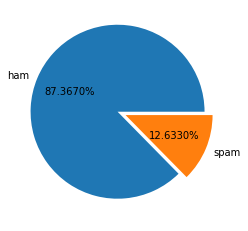

In [15]:
plt.pie(spam_df['target'].value_counts(),labels=['ham','spam'],autopct='%0.4f%%',explode=[0.1,0])
plt.show()

Will address class imbalance later on...

#### text processing using NLTK

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer

from textblob import TextBlob #library for processing textual data
from wordcloud import WordCloud, STOPWORDS #graphical representation of word frequencies


[nltk_data] Downloading package punkt to /Users/raghu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/raghu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# num of characters
spam_df['length'] = spam_df['text'].apply(len)

# num of words / tokens
spam_df['num_words'] = spam_df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# num of sentences
spam_df['num_sent'] = spam_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [18]:
spam_df.head()

,target,text,length,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


#### lowercase text, tokenization, remove special characters, remove stopwords and punctuation, stemming

In [19]:
import string

ps = PorterStemmer()

def cleaning_text(text):
    text = nltk.word_tokenize(text.lower())
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            stemming = ps.stem(i)
            y.append(stemming)
            
    return " ".join(y)

In [20]:
cleaning_text('Hey!! Did you get my memo from last night?? I am excited to visit you for graduation! yay :)')

'hey get memo last night excit visit graduat yay'

In [21]:
spam_df['cleaned_text'] = spam_df['text'].apply(cleaning_text)

In [22]:
spam_df.head()

,target,text,length,num_words,num_sent,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [23]:
# grouping data to understand the relationshi between churn and other factors
spam_df.groupby('target').describe().T

target                     0           1
length    count  4516.000000  653.000000
          mean     70.459256  137.891271
          std      56.358207   30.137753
          min       2.000000   13.000000
          25%      34.000000  132.000000
          50%      52.000000  149.000000
          75%      90.000000  157.000000
          max     910.000000  224.000000
num_words count  4516.000000  653.000000
          mean     17.120903   27.667688
          std      13.493725    7.008418
          min       1.000000    2.000000
          25%       8.000000   25.000000
          50%      13.000000   29.000000
          75%      22.000000   32.000000
          max     220.000000   46.000000
num_sent  count  4516.000000  653.000000
          mean      1.799601    2.967841
          std       1.278465    1.483201
          min       1.000000    1.000000
          25%       1.000000    2.000000
          50%       1.000000    3.000000
          75%       2.000000    4.000000
          max      28.000000    8.000000

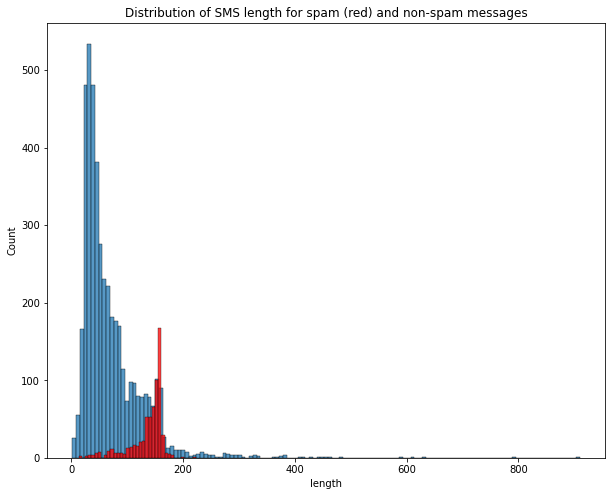

In [39]:
import seaborn as sns

plt.figure(figsize=(10,8))
plt.title('Distribution of SMS length for spam (red) and non-spam messages')
sns.histplot(spam_df[spam_df['target'] == 0]['length'])
sns.histplot(spam_df[spam_df['target'] == 1]['length'],color='red')
plt.show()

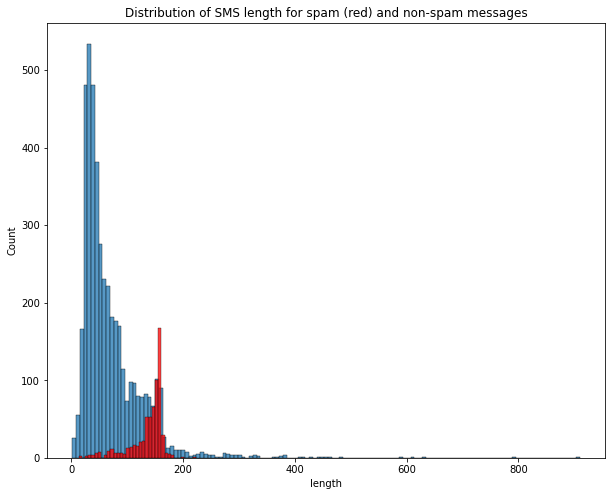

 avg length of spam messages: 137.89
 avg length of non-spam messages: 70.46
 Mean difference in length: 67.43201507791932 



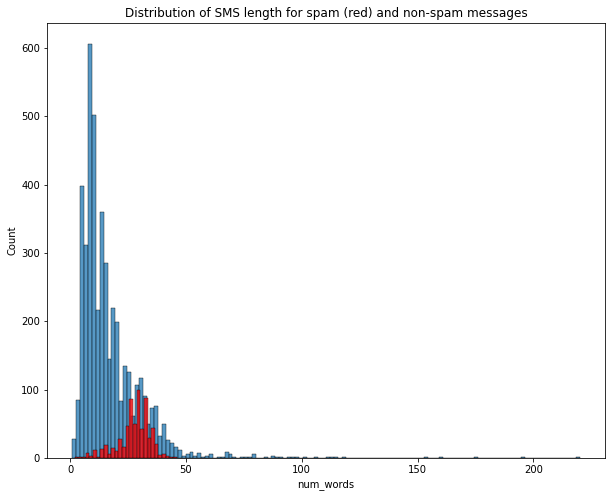

 avg num_words of spam messages: 27.67
 avg num_words of non-spam messages: 17.12
 Mean difference in num_words: 10.546784141327688 



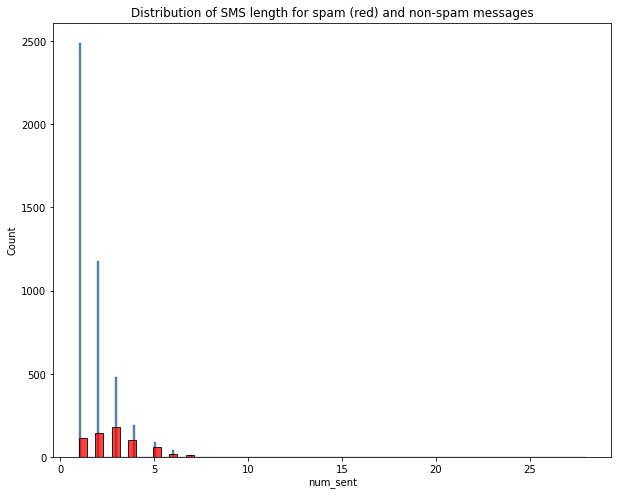

 avg num_sent of spam messages: 2.97
 avg num_sent of non-spam messages: 1.8
 Mean difference in num_sent: 1.1682393178855646 



In [58]:
for col in ['length', 'num_words', 'num_sent' ]:
    plt.figure(figsize=(10,8))
    plt.title('Distribution of SMS length for spam (red) and non-spam messages')
    sns.histplot(spam_df[spam_df['target'] == 0][col])
    sns.histplot(spam_df[spam_df['target'] == 1][col],color='red')
    plt.show()

    print(f" avg {str(col)} of spam messages: {spam_df[spam_df['target']==1][col].mean().round(2)}")
    print(f" avg {str(col)} of non-spam messages: {spam_df[spam_df['target']==0][col].mean().round(2)}")
    print(f" Mean difference in {str(col)}: {spam_df[spam_df['target']==1][col].mean() - spam_df[spam_df['target']==0][col].mean()} \n")

#### wordclouds

In [24]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

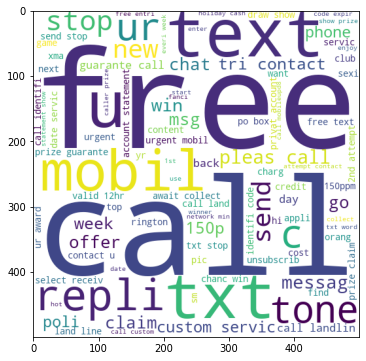

In [25]:
## Spam Word Cloud
spam_wc = wc.generate(spam_df[spam_df['target'] == 1]['cleaned_text'].str.cat(sep = " "))
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)
plt.show()

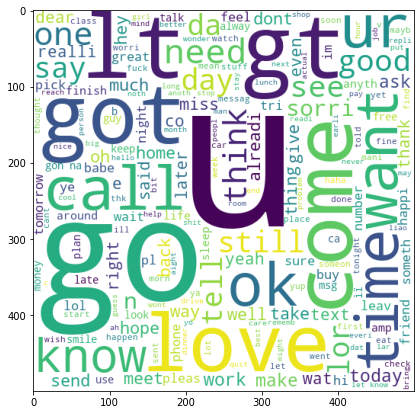

In [26]:
## Ham Word Cloud
spam_wc = wc.generate(spam_df[spam_df['target'] == 0]['cleaned_text'].str.cat(sep = " "))
plt.figure(figsize=(12,7))
plt.imshow(spam_wc)
plt.show()

#### model building

In [27]:
#Convert Our SMS text to Vectors Using Bag of Words Technique
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf = TfidfVectorizer()

In [28]:
X = tf.fit_transform(spam_df['cleaned_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
y = np.array(spam_df['target'])
y

array([0, 0, 1, ..., 0, 0, 0])

In [30]:
# splitting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=258,test_size=0.20)

In [31]:
# Print the shape of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (4135, 6708) (4135,)
Test set shape: (1034, 6708) (1034,)


#### making predictions

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [ ]:
https://www.kaggle.com/code/mdtamzidulislam/spam-eda-preprocess-prediction